# Simple Random Walk
___
A simple random walk $S(n)$ is a discrete-time stochastic processes on a lattice, which moves to its neighborhood at the same probability at each step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
def simple_ramdom_walk(step, dim=1):
    r = np.random.choice(dim*2, step)
    one_hot = np.identity(dim*2, dtype=int)[r]
    one_hot = one_hot.T
    diff = one_hot[:dim] - one_hot[dim:]
    diff[:, 0] = 0
    walk = np.cumsum(diff, axis=1)
    if dim == 1:
        walk = walk[0]
    return walk

### 1 dimension

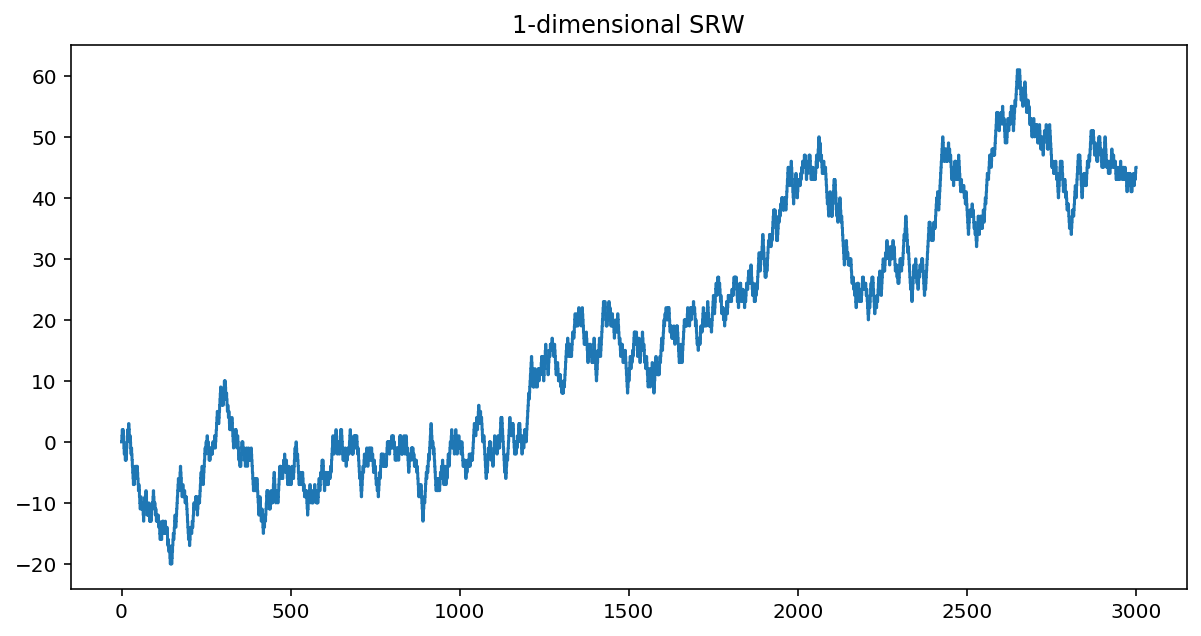

In [3]:
step = 3000

plt.figure(figsize=(10, 5))

walk = simple_ramdom_walk(step)

t = []
x = list()
for i, coord in enumerate(walk):
    t.extend([i, i+1])
    x.extend([coord]*2)

plt.plot(t, x)
plt.title('1-dimensional SRW')
plt.show()

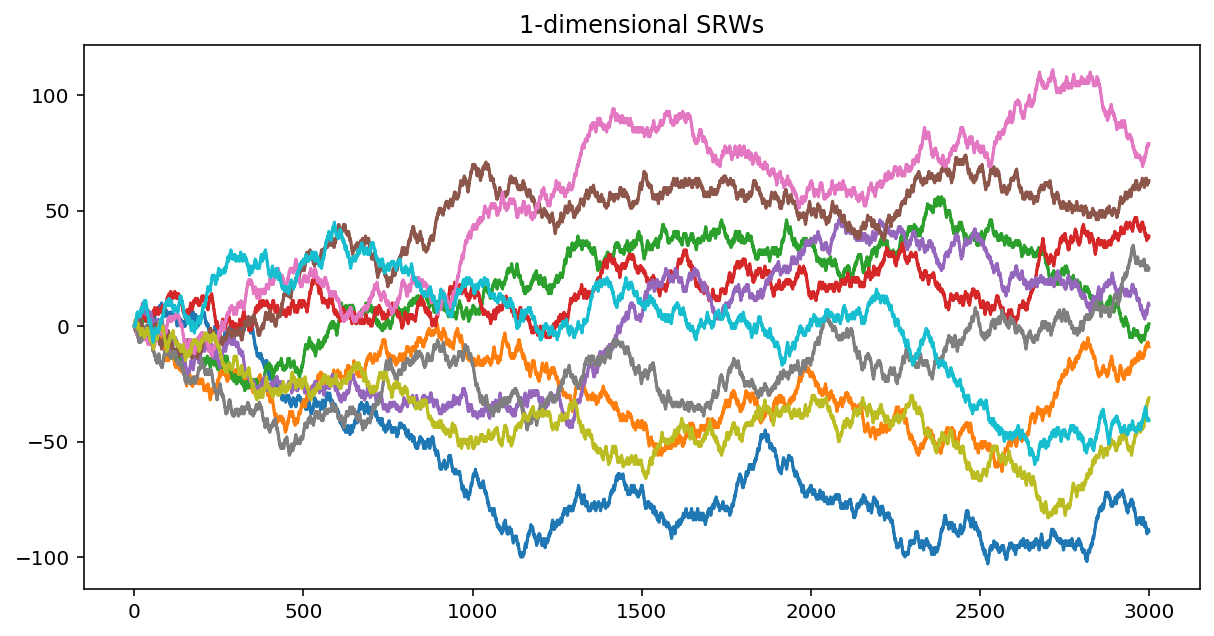

In [4]:
step = 3000
num = 20

plt.figure(figsize=(10, 5))

for _ in range(10):
    walk = simple_ramdom_walk(step)
    t = []
    x = list()
    for i, coord in enumerate(walk):
        t.extend([i, i+1])
        x.extend([coord]*2)
    plt.plot(t, x)
plt.title("1-dimensional SRWs")
plt.show()

By using central limit theorem, Random walks $S(\lfloor nt \rfloor)/\sqrt{nt}$ converge in distribution to Brownian motions $B(t)$ as $n \to \infty$.

### 2 dimension

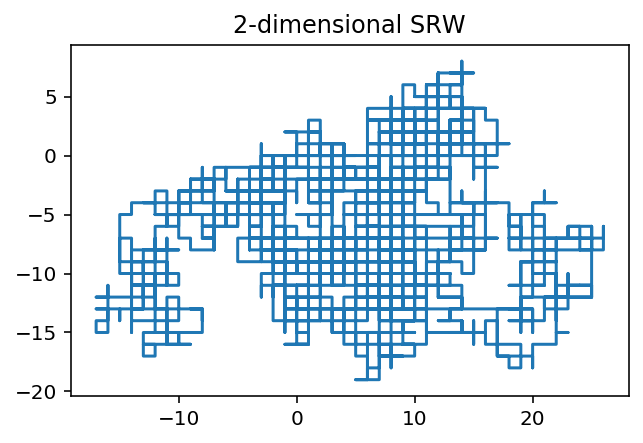

In [5]:
step = 3000
dim = 2

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

x, y = simple_ramdom_walk(step, dim)
plt.plot(x, y)
plt.title("2-dimensional SRW")
plt.show()

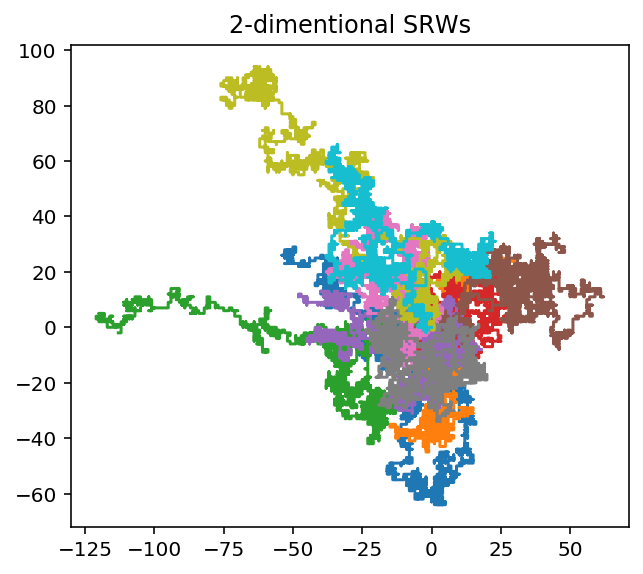

In [6]:
step = 3000
dim = 2
num = 10

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

for _ in range(num):
    x, y = simple_ramdom_walk(step, dim)
    plt.plot(x, y)
plt.title("2-dimentional SRWs")
plt.show()

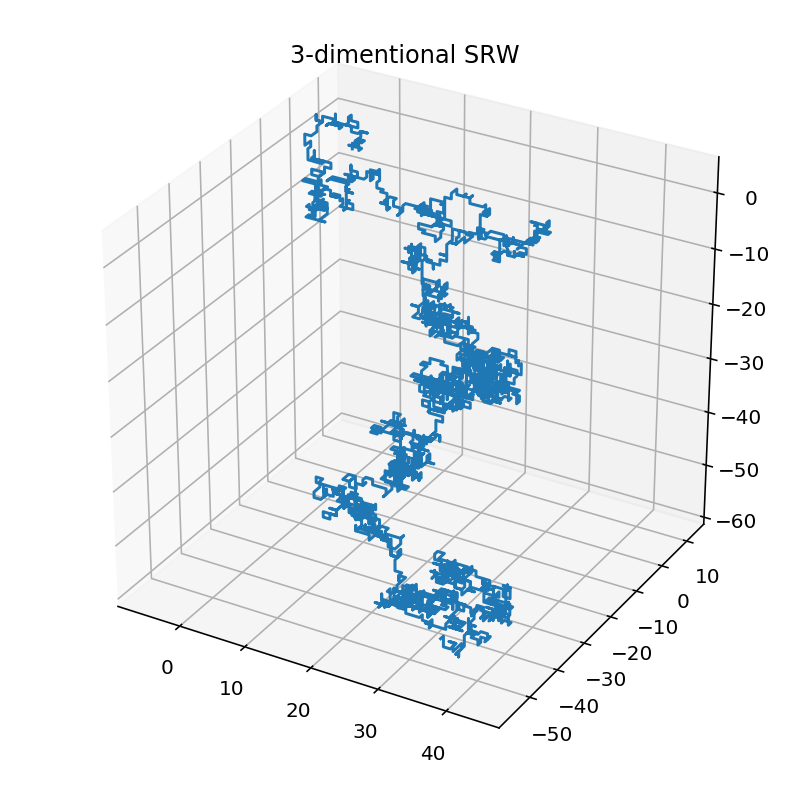

In [7]:
from mpl_toolkits.mplot3d import Axes3D

step = 3000
dim = 3

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x, y, z = simple_ramdom_walk(step, dim)
ax.plot(x, y, z)
ax.set_title("3-dimentional SRW")
plt.show()

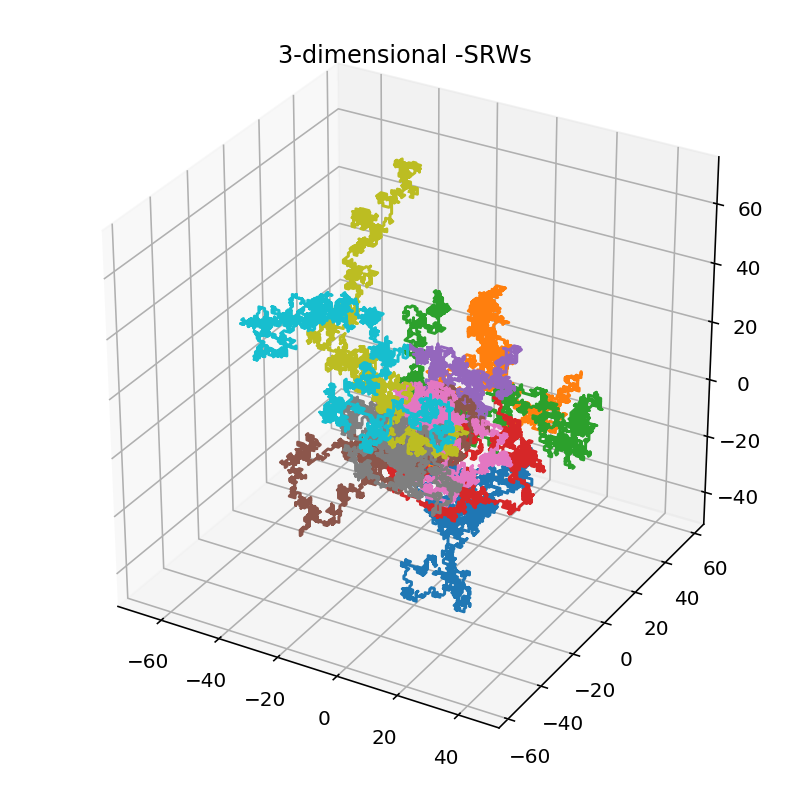

In [8]:
step = 3000
dim = 3
num = 10

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')


for _ in range(num):
    x, y, z = simple_ramdom_walk(step, dim)
    ax.plot(x, y, z)
ax.set_title("3-dimensional -SRWs")
plt.show()

## Recurrence of Simple random walk
___
Fact: 2 dimensional simple random walks have the recurrence, but 3 or more dimensional simple random walks don't.

In [4]:
step = int(1e+7)
num = 1000

cross_num = 0
for _ in range(num):
    x = simple_ramdom_walk(step)[1:]
    cross_num += np.any(x == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 1000
Cross number: 1000
Probability: 1.0


In [6]:
%%time
step = int(1e+7)
dim = 2
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 80
Probability: 0.8
Wall time: 1min 22s


In [7]:
%%time
step = int(1e+7)
dim = 3
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 32
Probability: 0.32
Wall time: 1min 45s


In [8]:
%%time
step = int(1e+7)
dim = 4
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 15
Probability: 0.15
Wall time: 1min 55s


In [9]:
%%time
step = int(1e+7)
dim = 10
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 4
Probability: 0.04
Wall time: 4min 18s


## Law of the iterated logarithm
___

$$ \limsup_{n \to \infty} \frac{S(n)}{\sqrt{2n\log \log n}} = 1 \,\,\, a.s.,$$
where $S(n)$ is a 1-dimensional simple random walk.

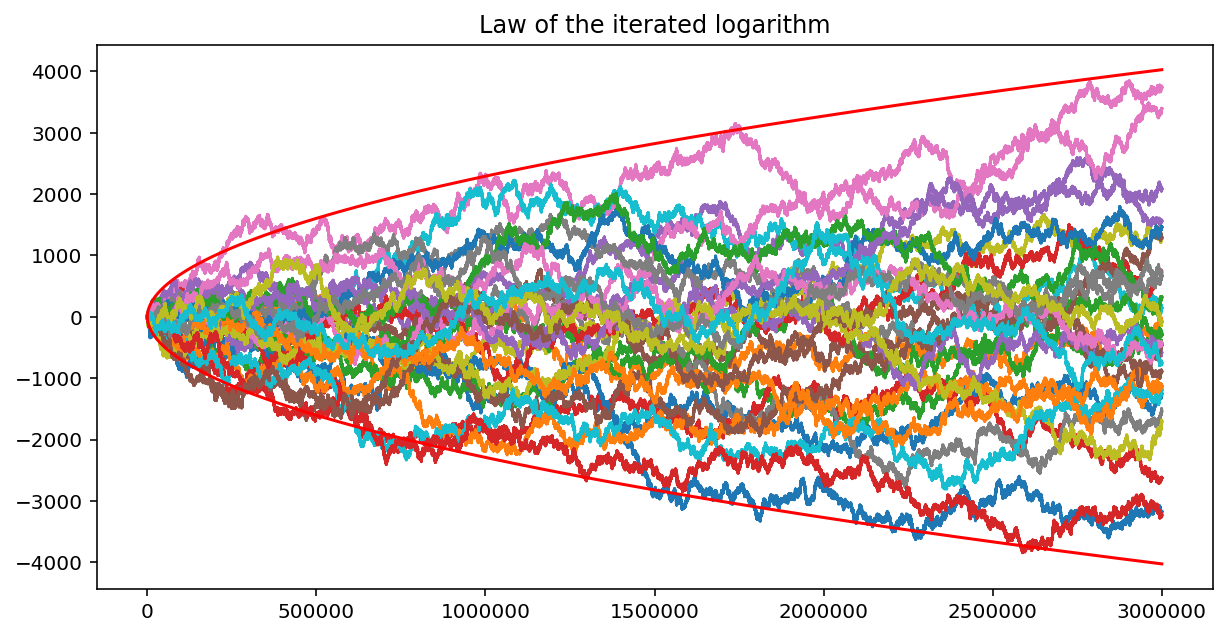

CPU times: user 28.3 s, sys: 23.4 s, total: 51.7 s
Wall time: 54.8 s


In [10]:
%%time
step = 3000000
num = 30

plt.figure(figsize=(10, 5))

for _ in range(num):
    walk = simple_ramdom_walk(step)
    plt.plot(walk)

n = np.arange(3, step+1)
x_the = np.sqrt(2 * n * np.log(np.log(n)))
plt.plot(n, x_the, color='r')
plt.plot(n, -x_the, color='r')
plt.title("Law of the iterated logarithm")
plt.show()

### Arc-sine law of Lévy

Same as Brownia motion. See `brownian-motion.ipynb`.